In [1]:
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning)
wrn.filterwarnings('ignore', category = FutureWarning)
wrn.filterwarnings('ignore', category = UserWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_csv('mountains_vs_beaches_preferences.csv')
df

Age      Gender  Income Education_Level  Travel_Frequency  \
0       56        male   71477        bachelor                 9   
1       69        male   88740          master                 1   
2       46      female   46562          master                 0   
3       32  non-binary   99044     high school                 6   
4       60      female  106583     high school                 5   
...    ...         ...     ...             ...               ...   
52439   67      female   85325          master                 3   
52440   37      female  110346        bachelor                 7   
52441   53  non-binary   71080       doctorate                 7   
52442   40      female   75174       doctorate                 9   
52443   33  non-binary   34475          master                 6   

      Preferred_Activities  Vacation_Budget  Location  Proximity_to_Mountains  \
0                   skiing             2477     urban                     175   
1                 swimming             4777  suburban                     228   
2                   skiing             1469     urban                      71   
3                   hiking             1482     rural                      31   
4               sunbathing              516  suburban                      23   
...                    ...              ...       ...                     ...   
52439               hiking             1762  suburban                      51   
52440             swimming             1676     urban                     259   
52441             swimming             3877     urban                     164   
52442             swimming             4620  suburban                     173   
52443               hiking              928  suburban                     218   

       Proximity_to_Beaches Favorite_Season  Pets  Environmental_Concerns  \
0                       267          summer     0                       1   
1                       190            fall     0                       1   
2                       280          winter     0                       0   
3                       255          summer     1                       0   
4                       151          winter     1                       1   
...                     ...             ...   ...                     ...   
52439                   262            fall     1                       0   
52440                    84          spring     1                       0   
52441                    27            fall     0                       1   
52442                    10          summer     0                       1   
52443                   166          spring     1                       0   

       Preference  
0               1  
1               0  
2               1  
3               1  
4               0  
...           ...  
52439           1  
52440           0  
52441           0  
52442           0  
52443           0  

[52444 rows x 14 columns]

In [5]:
df.shape

(52444, 14)

In [7]:
df.isnull().sum()

Age                       0
Gender                    0
Income                    0
Education_Level           0
Travel_Frequency          0
Preferred_Activities      0
Vacation_Budget           0
Location                  0
Proximity_to_Mountains    0
Proximity_to_Beaches      0
Favorite_Season           0
Pets                      0
Environmental_Concerns    0
Preference                0
dtype: int64

In [9]:
df.columns

Index(['Age', 'Gender', 'Income', 'Education_Level', 'Travel_Frequency',
       'Preferred_Activities', 'Vacation_Budget', 'Location',
       'Proximity_to_Mountains', 'Proximity_to_Beaches', 'Favorite_Season',
       'Pets', 'Environmental_Concerns', 'Preference'],
      dtype='object')

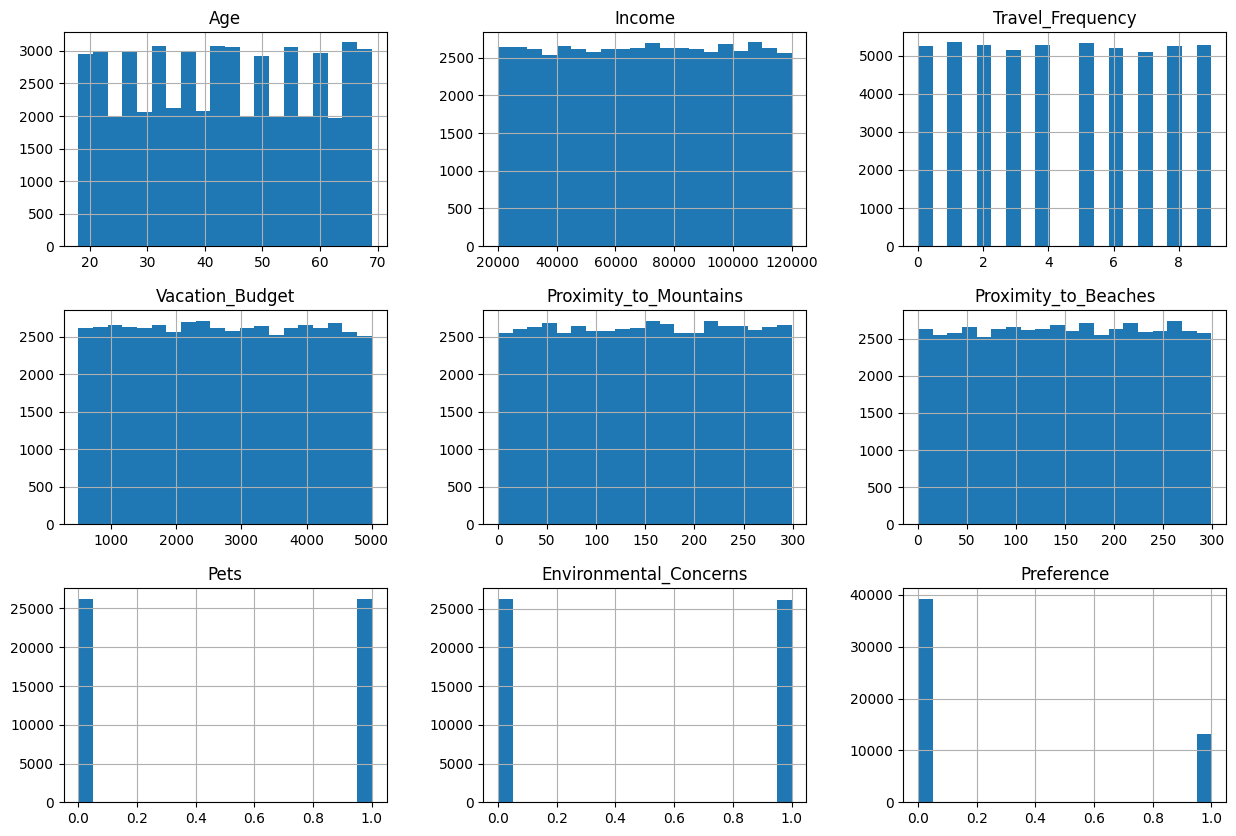

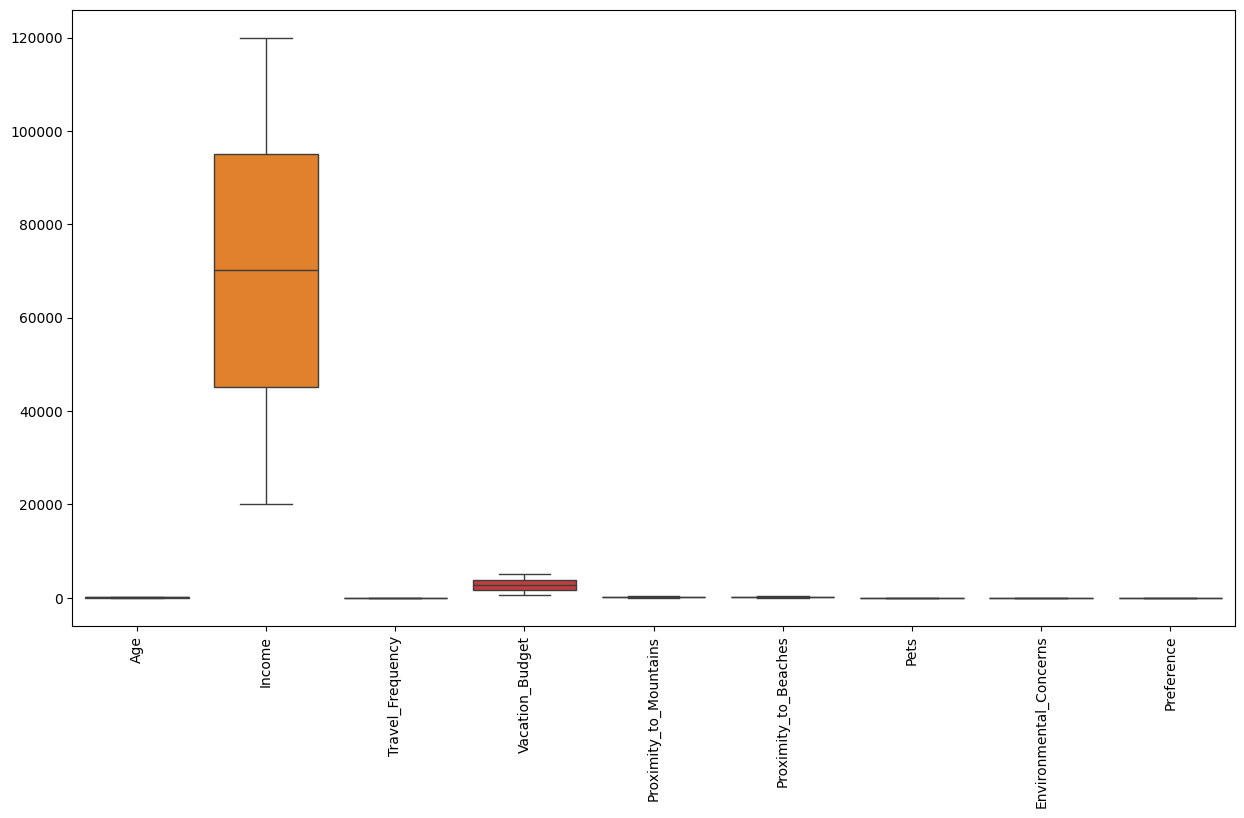

In [11]:
df.hist(bins=20, figsize=(15, 10))
plt.show()

# Box plots to visualize potential outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.xticks(rotation=90)
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     52444 non-null  int64 
 1   Gender                  52444 non-null  object
 2   Income                  52444 non-null  int64 
 3   Education_Level         52444 non-null  object
 4   Travel_Frequency        52444 non-null  int64 
 5   Preferred_Activities    52444 non-null  object
 6   Vacation_Budget         52444 non-null  int64 
 7   Location                52444 non-null  object
 8   Proximity_to_Mountains  52444 non-null  int64 
 9   Proximity_to_Beaches    52444 non-null  int64 
 10  Favorite_Season         52444 non-null  object
 11  Pets                    52444 non-null  int64 
 12  Environmental_Concerns  52444 non-null  int64 
 13  Preference              52444 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5.6+ MB


In [15]:
df.nunique()

Age                          52
Gender                        3
Income                    40983
Education_Level               4
Travel_Frequency             10
Preferred_Activities          4
Vacation_Budget            4500
Location                      3
Proximity_to_Mountains      300
Proximity_to_Beaches        300
Favorite_Season               4
Pets                          2
Environmental_Concerns        2
Preference                    2
dtype: int64

In [17]:
df["Favorite_Season"].unique()

array(['summer', 'fall', 'winter', 'spring'], dtype=object)

In [19]:
df["Gender"].replace(to_replace = ['non-binary', 'male', 'female'], value = [0, 1, 2], inplace = True)
df["Education_Level"].replace(to_replace = ['high school', 'bachelor', 'master', 'doctorate'], value = [0, 1, 2, 3], inplace = True)
df["Preferred_Activities"].replace(to_replace = ['sunbathing', 'swimming', 'hiking', 'skiing'], value = [0, 1, 2, 3], inplace = True)
df["Location"].replace(to_replace = ['urban', 'suburban', 'rural'], value = [0, 1, 2], inplace = True)
df["Favorite_Season"].replace(to_replace = ['spring', 'summer', 'fall', 'winter'], value = [0, 1, 2, 3], inplace = True)
df[["Gender", "Education_Level", "Preferred_Activities", "Location", "Favorite_Season"]] = df[["Gender", "Education_Level", "Preferred_Activities", "Location", "Favorite_Season"]].apply(pd.to_numeric)
df.head(10)

Age  Gender  Income  Education_Level  Travel_Frequency  \
0   56       1   71477                1                 9   
1   69       1   88740                2                 1   
2   46       2   46562                2                 0   
3   32       0   99044                0                 6   
4   60       2  106583                0                 5   
5   25       1  110588                3                 3   
6   38       1   22245                1                 1   
7   56       0  109411                1                 8   
8   36       1   22531                2                 6   
9   40       0   90840                0                 1   

   Preferred_Activities  Vacation_Budget  Location  Proximity_to_Mountains  \
0                     3             2477         0                     175   
1                     1             4777         1                     228   
2                     3             1469         0                      71   
3                     2             1482         2                      31   
4                     0              516         1                      23   
5                     0             2895         0                       6   
6                     1             4994         2                     157   
7                     0             3656         0                     210   
8                     1             2408         1                     218   
9                     1             4044         2                     271   

   Proximity_to_Beaches  Favorite_Season  Pets  Environmental_Concerns  \
0                   267                1     0                       1   
1                   190                2     0                       1   
2                   280                3     0                       0   
3                   255                1     1                       0   
4                   151                3     1                       1   
5                    47                2     0                       1   
6                   225                2     0                       1   
7                   166                3     1                       0   
8                   263                1     1                       1   
9                    15                1     1                       1   

   Preference  
0           1  
1           0  
2           1  
3           1  
4           0  
5           0  
6           0  
7           0  
8           0  
9           0

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     52444 non-null  int64
 1   Gender                  52444 non-null  int64
 2   Income                  52444 non-null  int64
 3   Education_Level         52444 non-null  int64
 4   Travel_Frequency        52444 non-null  int64
 5   Preferred_Activities    52444 non-null  int64
 6   Vacation_Budget         52444 non-null  int64
 7   Location                52444 non-null  int64
 8   Proximity_to_Mountains  52444 non-null  int64
 9   Proximity_to_Beaches    52444 non-null  int64
 10  Favorite_Season         52444 non-null  int64
 11  Pets                    52444 non-null  int64
 12  Environmental_Concerns  52444 non-null  int64
 13  Preference              52444 non-null  int64
dtypes: int64(14)
memory usage: 5.6 MB


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Age', 'Gender', 'Income', 'Education_Level', 'Travel_Frequency', 'Preferred_Activities', 'Vacation_Budget', 'Location', 'Proximity_to_Mountains', 'Proximity_to_Beaches', 'Favorite_Season', 'Pets', 'Environmental_Concerns', 'Preference']] = scaler.fit_transform(df[['Age', 'Gender', 'Income', 'Education_Level', 'Travel_Frequency', 'Preferred_Activities', 'Vacation_Budget', 'Location', 'Proximity_to_Mountains', 'Proximity_to_Beaches', 'Favorite_Season', 'Pets', 'Environmental_Concerns', 'Preference']])
df

Age  Gender    Income  Education_Level  Travel_Frequency  \
0      0.745098     0.5  0.514770         0.333333          1.000000   
1      1.000000     0.5  0.687404         0.666667          0.111111   
2      0.549020     1.0  0.265615         0.666667          0.000000   
3      0.274510     0.0  0.790446         0.000000          0.666667   
4      0.823529     1.0  0.865837         0.000000          0.555556   
...         ...     ...       ...              ...               ...   
52439  0.960784     1.0  0.653253         0.666667          0.333333   
52440  0.372549     1.0  0.903468         0.333333          0.777778   
52441  0.686275     0.0  0.510800         1.000000          0.777778   
52442  0.431373     1.0  0.551741         1.000000          1.000000   
52443  0.294118     0.0  0.144743         0.666667          0.666667   

       Preferred_Activities  Vacation_Budget  Location  \
0                  1.000000         0.439431       0.0   
1                  0.333333         0.950656       0.5   
2                  1.000000         0.215381       0.0   
3                  0.666667         0.218271       1.0   
4                  0.000000         0.003556       0.5   
...                     ...              ...       ...   
52439              0.666667         0.280507       0.5   
52440              0.333333         0.261391       0.0   
52441              0.333333         0.750611       0.0   
52442              0.333333         0.915759       0.5   
52443              0.666667         0.095132       0.5   

       Proximity_to_Mountains  Proximity_to_Beaches  Favorite_Season  Pets  \
0                    0.585284              0.892977         0.333333   0.0   
1                    0.762542              0.635452         0.666667   0.0   
2                    0.237458              0.936455         1.000000   0.0   
3                    0.103679              0.852843         0.333333   1.0   
4                    0.076923              0.505017         1.000000   1.0   
...                       ...                   ...              ...   ...   
52439                0.170569              0.876254         0.666667   1.0   
52440                0.866221              0.280936         0.000000   1.0   
52441                0.548495              0.090301         0.666667   0.0   
52442                0.578595              0.033445         0.333333   0.0   
52443                0.729097              0.555184         0.000000   1.0   

       Environmental_Concerns  Preference  
0                         1.0         1.0  
1                         1.0         0.0  
2                         0.0         1.0  
3                         0.0         1.0  
4                         1.0         0.0  
...                       ...         ...  
52439                     0.0         1.0  
52440                     0.0         0.0  
52441                     1.0         0.0  
52442                     1.0         0.0  
52443                     0.0         0.0  

[52444 rows x 14 columns]

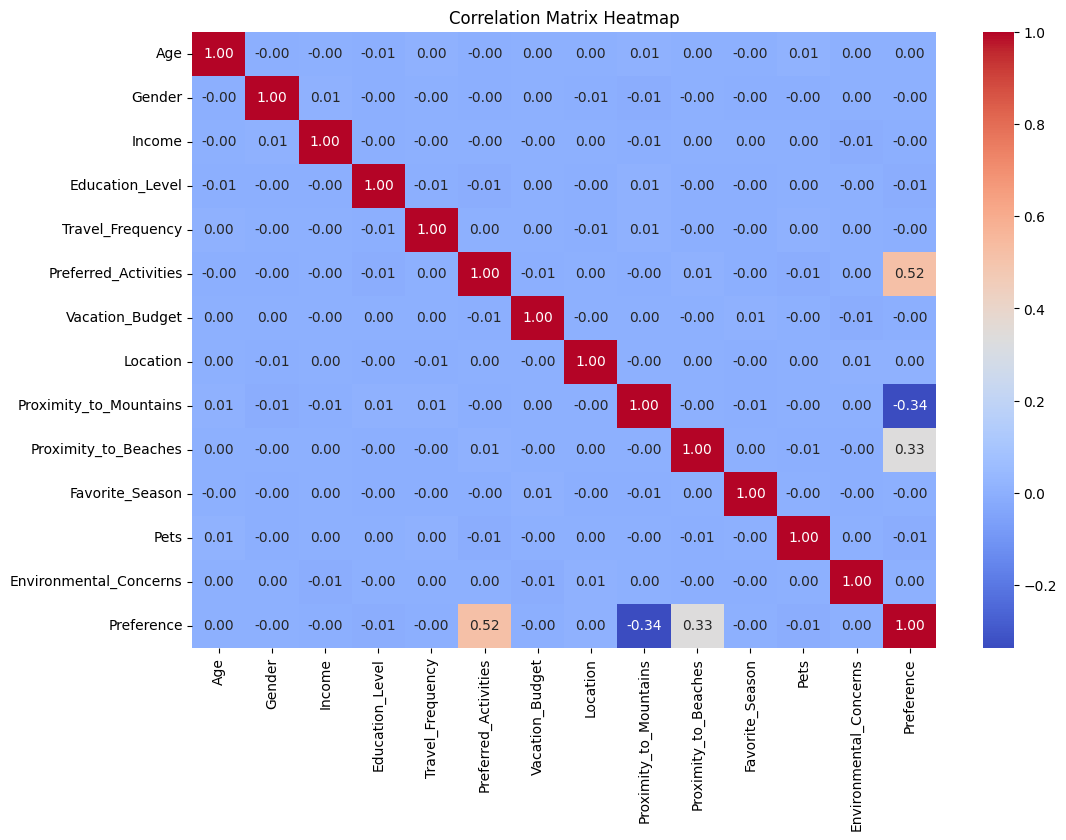

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

<Figure size 1500x1000 with 0 Axes>

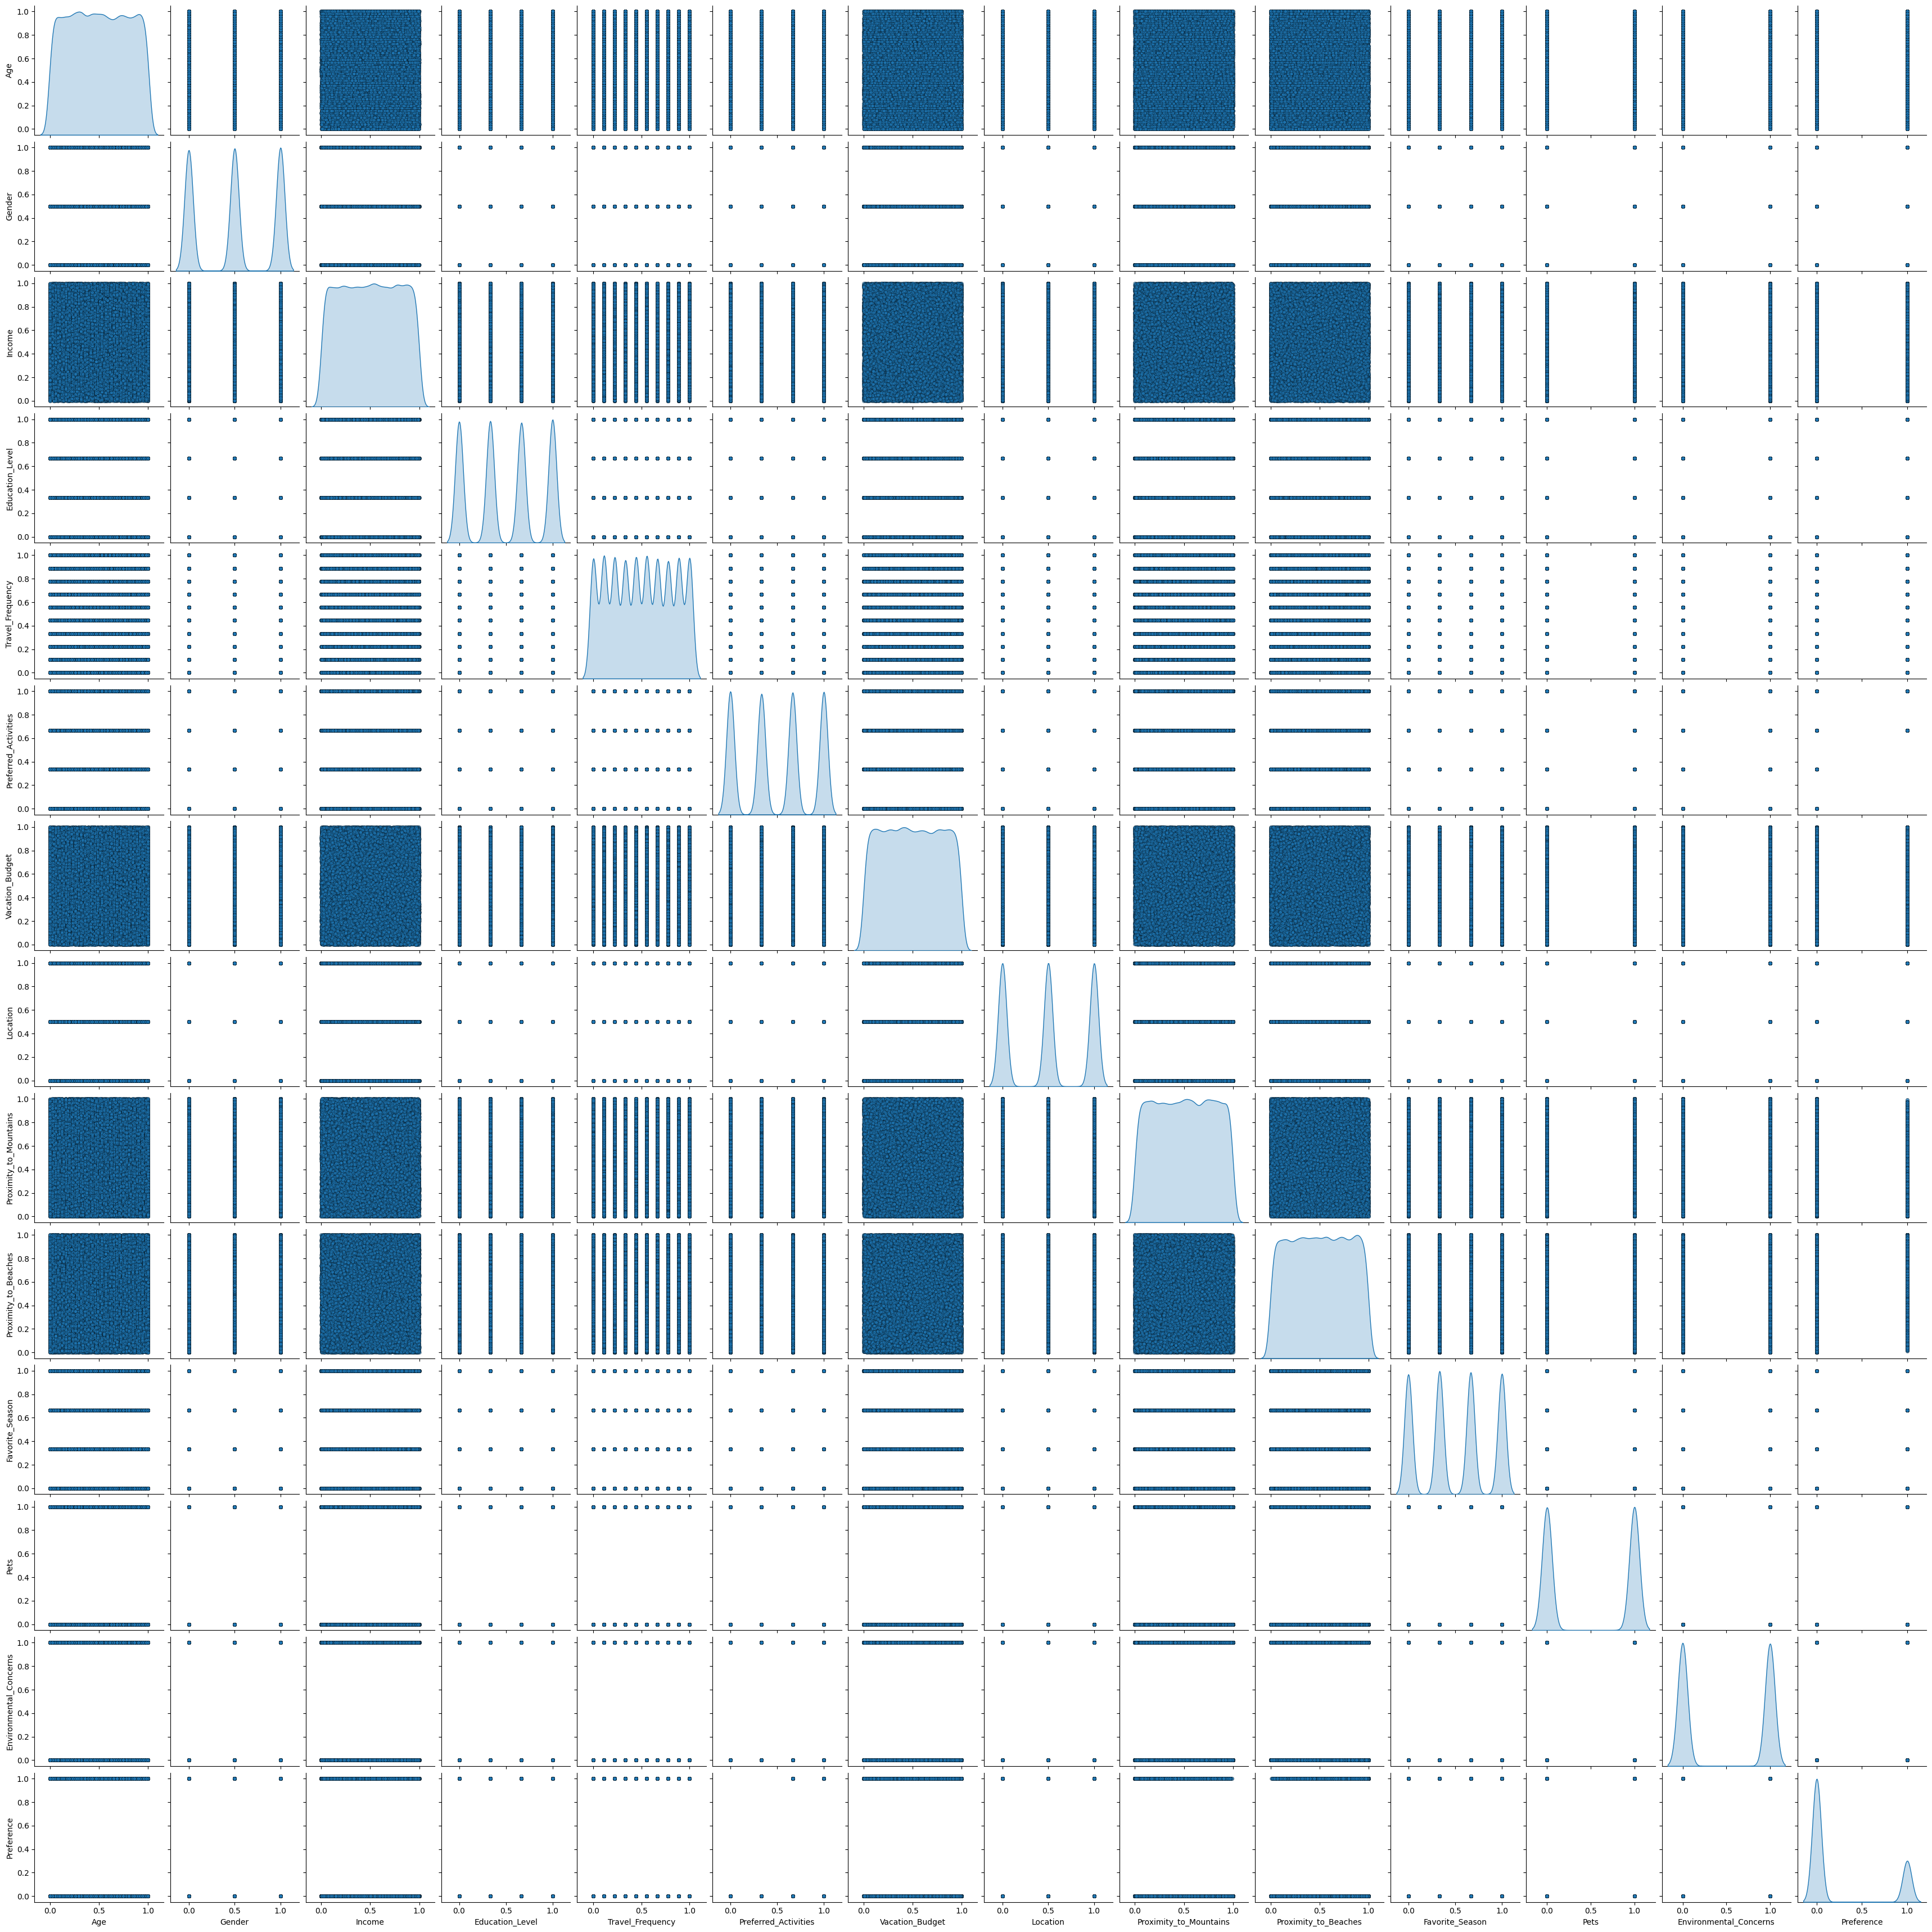

In [27]:
plt.figure(figsize=(15, 10))
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha':0.5, 's':20, 'edgecolor':'k'})
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
df_final_X = df[['Education_Level', 'Preferred_Activities', 'Proximity_to_Mountains', 'Proximity_to_Beaches', 'Pets']]
df_final_y = df[['Preference']]
X_train, X_test, y_train, y_test = train_test_split(df_final_X, df_final_y, test_size=0.3)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score 
neigh = KNeighborsClassifier(n_neighbors=4, metric='euclidean', weights='distance')
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print(f"Model's Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Model's Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred)}")
print(f"Model's Precision: {precision_score(y_test, y_pred)}")
print(f"Model's Recall: {recall_score(y_test, y_pred)}")
print(f"Model's F1: {f1_score(y_test, y_pred)}")
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Model's Accuracy: 0.993962120249142
Model's Balanced Accuracy: 0.9932528545175409
Model's Precision: 0.9840587044534413
Model's Recall: 0.9918388166284111
Model's F1: 0.9879334434142004
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     11813
         1.0       0.98      0.99      0.99      3921

    accuracy                           0.99     15734
   macro avg       0.99      0.99      0.99     15734
weighted avg       0.99      0.99      0.99     15734

Confusion Matrix:
[[11750    63]
 [   32  3889]]


In [105]:
from sklearn.model_selection import GridSearchCV
n_clf = KNeighborsClassifier(n_neighbors=3)
param_grid = {
    'n_neighbors': [2, 3, 4, 5],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'] 
}
grid_search = GridSearchCV(n_clf, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
Best cross-validation score: 0.99


In [41]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print(f"Model's Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Model's Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred)}")
print(f"Model's Precision: {precision_score(y_test, y_pred)}")
print(f"Model's Recall: {recall_score(y_test, y_pred)}")
print(f"Model's F1: {f1_score(y_test, y_pred)}")
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Model's Accuracy: 0.9959959323757468
Model's Balanced Accuracy: 0.9950332557384454
Model's Precision: 0.9908396946564886
Model's Recall: 0.9931140015302219
Model's F1: 0.9919755445166221
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11813
         1.0       0.99      0.99      0.99      3921

    accuracy                           1.00     15734
   macro avg       0.99      1.00      0.99     15734
weighted avg       1.00      1.00      1.00     15734

Confusion Matrix:
[[11777    36]
 [   27  3894]]


In [43]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, df_final_X, df_final_y, cv=10)

array([0.99714013, 0.99847474, 0.99675882, 0.99847474, 0.99713959,
       0.99809306, 0.99713959, 0.99790236, 0.99771167, 0.99523265])

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print(f"Model's Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Model's Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred)}")
print(f"Model's Precision: {precision_score(y_test, y_pred)}")
print(f"Model's Recall: {recall_score(y_test, y_pred)}")
print(f"Model's F1: {f1_score(y_test, y_pred)}")
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Model's Accuracy: 0.9965043854073979
Model's Balanced Accuracy: 0.9957978269415729
Model's Precision: 0.9916073245167853
Model's Recall: 0.9943891864320327
Model's F1: 0.9929963071437667
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11813
         1.0       0.99      0.99      0.99      3921

    accuracy                           1.00     15734
   macro avg       0.99      1.00      1.00     15734
weighted avg       1.00      1.00      1.00     15734

Confusion Matrix:
[[11780    33]
 [   22  3899]]


In [47]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=0)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
print(f"Model's Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Model's Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred)}")
print(f"Model's Precision: {precision_score(y_test, y_pred)}")
print(f"Model's Recall: {recall_score(y_test, y_pred)}")
print(f"Model's F1: {f1_score(y_test, y_pred)}")
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Model's Accuracy: 0.994279903393924
Model's Balanced Accuracy: 0.9923569866585196
Model's Precision: 0.9885233358837031
Model's Recall: 0.9885233358837031
Model's F1: 0.9885233358837031
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11813
         1.0       0.99      0.99      0.99      3921

    accuracy                           0.99     15734
   macro avg       0.99      0.99      0.99     15734
weighted avg       0.99      0.99      0.99     15734

Confusion Matrix:
[[11768    45]
 [   45  3876]]


In [49]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='rbf', gamma=1, C=100)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
print(f"Model's Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Model's Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred)}")
print(f"Model's Precision: {precision_score(y_test, y_pred)}")
print(f"Model's Recall: {recall_score(y_test, y_pred)}")
print(f"Model's F1: {f1_score(y_test, y_pred)}")
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Model's Accuracy: 0.9985381975340027
Model's Balanced Accuracy: 0.9982597660780004
Model's Precision: 0.9964340295466123
Model's Recall: 0.9977046671767407
Model's F1: 0.997068943545304
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11813
         1.0       1.00      1.00      1.00      3921

    accuracy                           1.00     15734
   macro avg       1.00      1.00      1.00     15734
weighted avg       1.00      1.00      1.00     15734

Confusion Matrix:
[[11799    14]
 [    9  3912]]


In [ ]:
from sklearn.model_selection import GridSearchCV
svm_clf = SVC()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}
grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
